In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Import Data and Initial Inspection

In [2]:
# Load data
data = pd.read_csv('user_profiles_for_ads.csv')
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [3]:
# Check for null values
print(data.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


In [4]:
# Column information
print(data.info())

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   str    
 2   Gender                           1000 non-null   str    
 3   Location                         1000 non-null   str    
 4   Language                         1000 non-null   str    
 5   Education Level                  1000 non-null   str    
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   str    
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates                

In [5]:
# Descriptive statistics
print(data.describe())

           User ID  Likes and Reactions  Followed Accounts  \
count  1000.000000          1000.000000        1000.000000   
mean    500.500000          4997.084000         251.438000   
std     288.819436          2838.494365         141.941557   
min       1.000000           101.000000          10.000000   
25%     250.750000          2661.250000         126.000000   
50%     500.500000          5002.500000         245.500000   
75%     750.250000          7348.750000         377.000000   
max    1000.000000          9973.000000         498.000000   

       Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
count                      1000.000000                      1000.000000   
mean                          2.757500                         4.601600   
std                           1.279735                         2.026234   
min                           0.500000                         1.000000   
25%                           1.700000                         2.9

# Step 2: Exploratory Data Analysis (EDA)

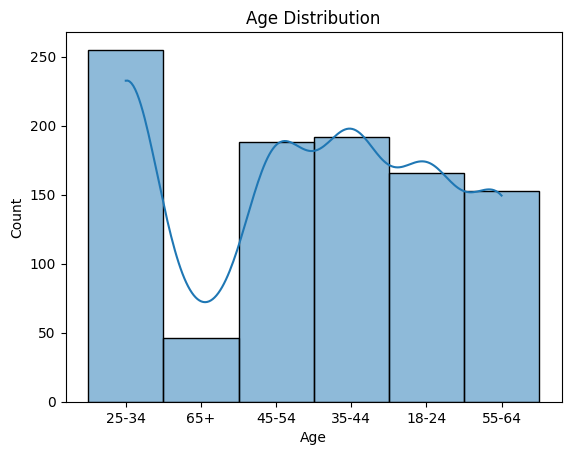

In [6]:
# Visualize demographic distributions
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

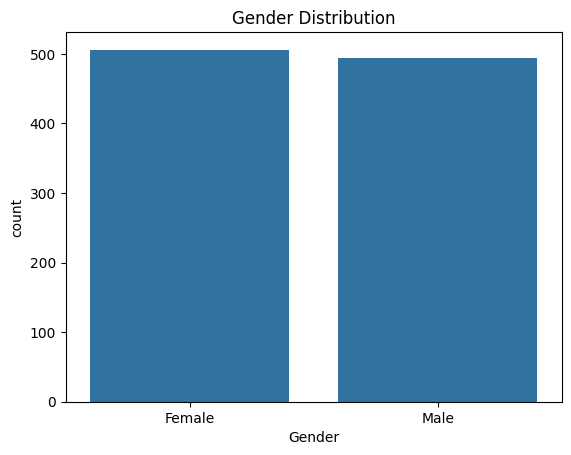

In [7]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

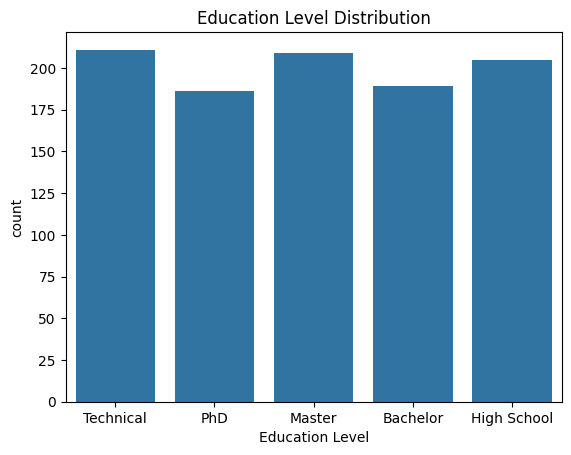

In [8]:
sns.countplot(x='Education Level', data=data)
plt.title('Education Level Distribution')
plt.show()

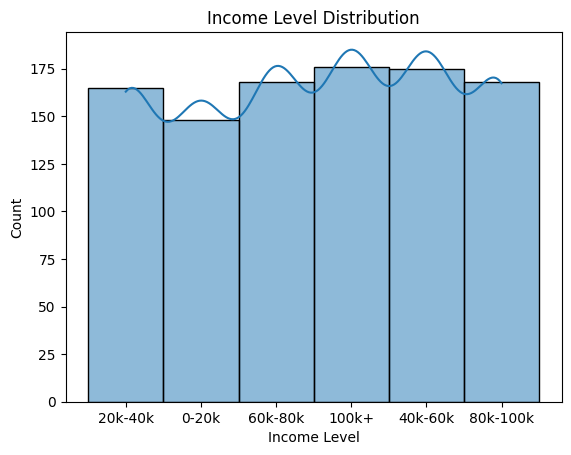

In [9]:
sns.histplot(data['Income Level'], kde=True)
plt.title('Income Level Distribution')
plt.show()

# Step 3: Analysis of Online Activity and Engagement

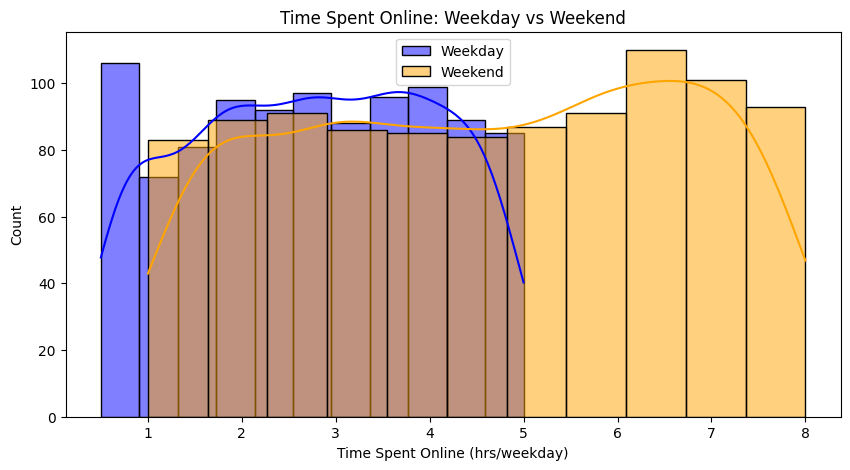

In [10]:
# Weekday vs Weekend Online Activity
plt.figure(figsize=(10, 5))
sns.histplot(data['Time Spent Online (hrs/weekday)'], color='blue', kde=True, label='Weekday')
sns.histplot(data['Time Spent Online (hrs/weekend)'], color='orange', kde=True, label='Weekend')
plt.title('Time Spent Online: Weekday vs Weekend')
plt.legend()
plt.show()

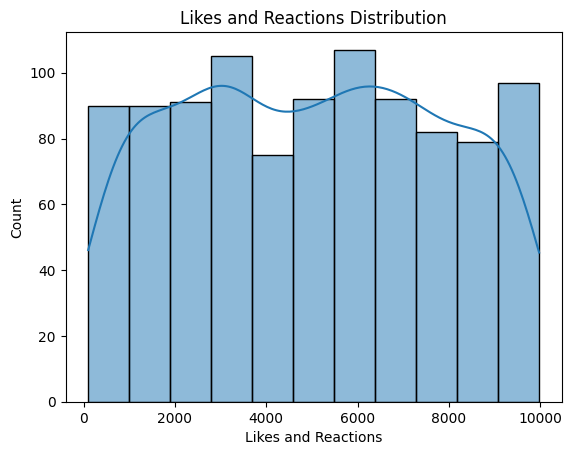

In [11]:
# User Engagement Metrics
sns.histplot(data['Likes and Reactions'], kde=True)
plt.title('Likes and Reactions Distribution')
plt.show()

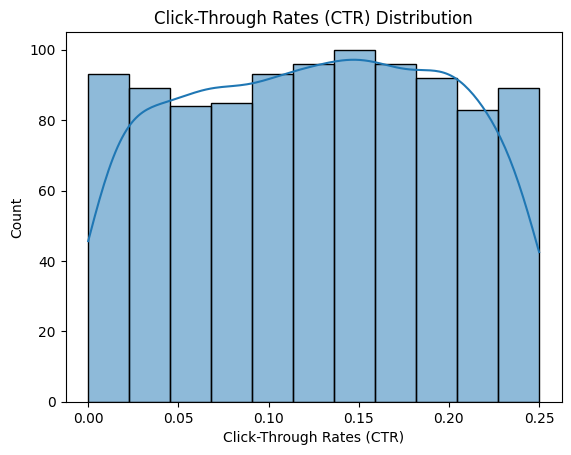

In [12]:
sns.histplot(data['Click-Through Rates (CTR)'], kde=True)
plt.title('Click-Through Rates (CTR) Distribution')
plt.show()

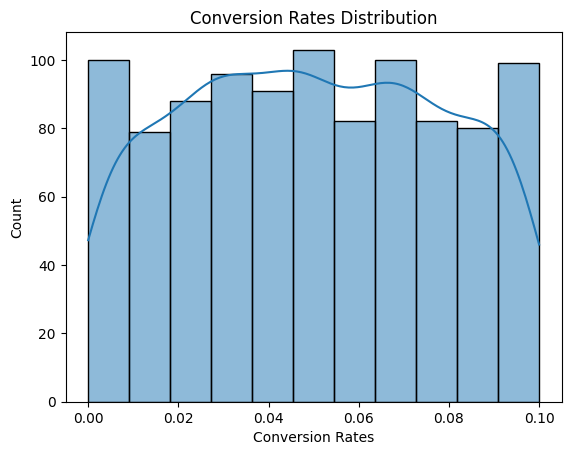

In [13]:
sns.histplot(data['Conversion Rates'], kde=True)
plt.title('Conversion Rates Distribution')
plt.show()

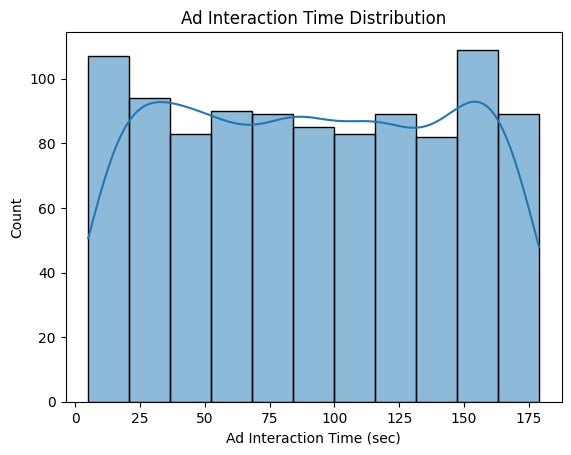

In [14]:
sns.histplot(data['Ad Interaction Time (sec)'], kde=True)
plt.title('Ad Interaction Time Distribution')
plt.show()

# Step 4: User Segmentation

In [15]:
# Converting Income Level to numeric
income_mapping = {
    '0-20k': 10,
    '20k-40k': 30,
    '40k-60k': 50,
    '60k-80k': 70,
    '80k-100k': 90,
    '100k+': 110
}
data['Income Level'] = data['Income Level'].map(income_mapping)

In [16]:
# Ensure all other features are numeric
features = data[['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions',
                 'Click-Through Rates (CTR)', 'Conversion Rates', 'Ad Interaction Time (sec)', 'Income Level']]

In [17]:
# Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [19]:
# A: Inspect the data types
print(data.dtypes)

User ID                              int64
Age                                    str
Gender                                 str
Location                               str
Language                               str
Education Level                        str
Likes and Reactions                  int64
Followed Accounts                    int64
Device Usage                           str
Time Spent Online (hrs/weekday)    float64
Time Spent Online (hrs/weekend)    float64
Click-Through Rates (CTR)          float64
Conversion Rates                   float64
Ad Interaction Time (sec)            int64
Income Level                         int64
Top Interests                          str
Cluster                              int32
dtype: object


In [20]:
# B: Select numeric columns
import numpy as np
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['User ID', 'Likes and Reactions', 'Followed Accounts',
       'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
       'Click-Through Rates (CTR)', 'Conversion Rates',
       'Ad Interaction Time (sec)', 'Income Level', 'Cluster'],
      dtype='str')


In [21]:
# C: Calculate the mean for numeric columns
cluster_means = data.groupby('Cluster')[numeric_columns].mean()

In [22]:
# D: Calculate the mode for all columns
cluster_modes = data.groupby('Cluster').agg(lambda x: x.value_counts().index[0])

print("Cluster Means:\n", cluster_means)

Cluster Means:
             User ID  Likes and Reactions  Followed Accounts  \
Cluster                                                       
0        496.474790          3176.542017         253.928571   
1        523.901639          6307.934426         261.032787   
2        510.756757          2344.070270         240.675676   
3        499.553846          7440.661538         254.764103   
4        475.185930          6040.869347         246.381910   

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               2.739076                         6.042857   
1                               3.620765                         3.186885   
2                               2.701081                         4.096757   
3                               2.529744                         6.348718   
4                               2.261307                         2.936181   

  

In [23]:
print("Cluster Modes:\n", cluster_modes)

Cluster Modes:
          User ID    Age  Gender  Location  Language Education Level  \
Cluster                                                               
0              3  25-34  Female  Suburban   English             PhD   
1              4  35-44  Female  Suburban   Spanish        Bachelor   
2              8  35-44    Male     Urban  Mandarin     High School   
3              2  25-34  Female     Urban     Hindi          Master   
4              1  25-34    Male     Urban   English       Technical   

         Likes and Reactions  Followed Accounts      Device Usage  \
Cluster                                                             
0                       1116                153      Desktop Only   
1                       4186                421      Desktop Only   
2                       2281                175       Mobile Only   
3                       6356                429  Mobile + Desktop   
4                       9245                264       Mobile Only   

  

# Step 5: Visualization and Summary

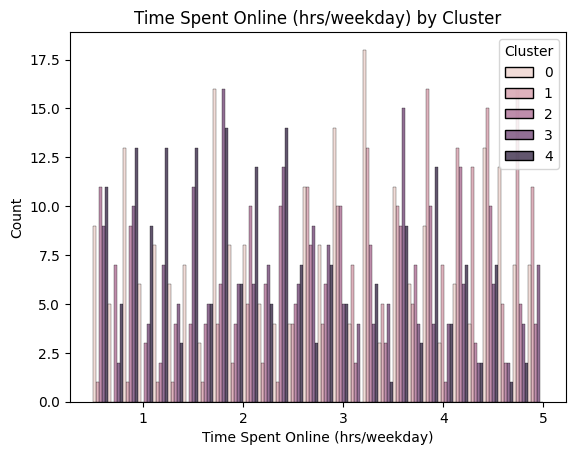

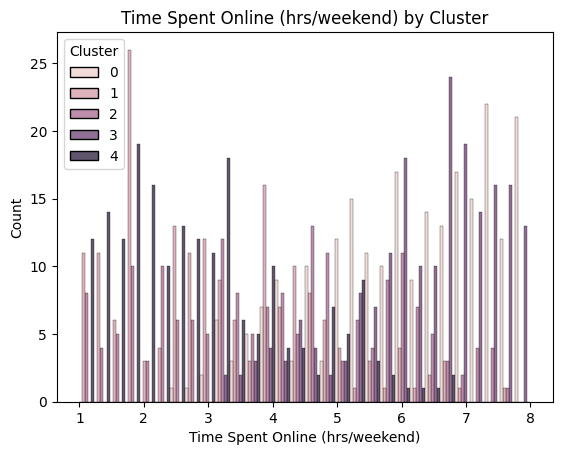

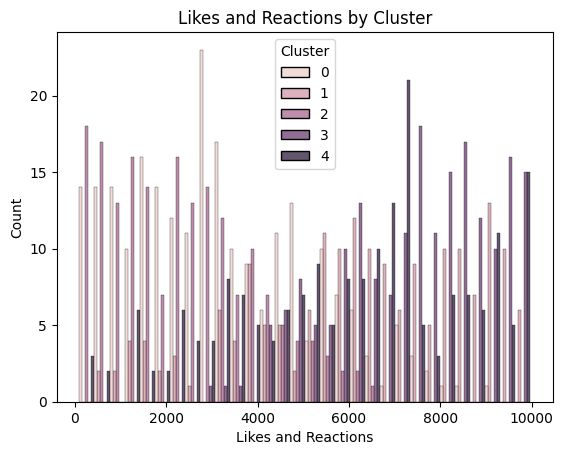

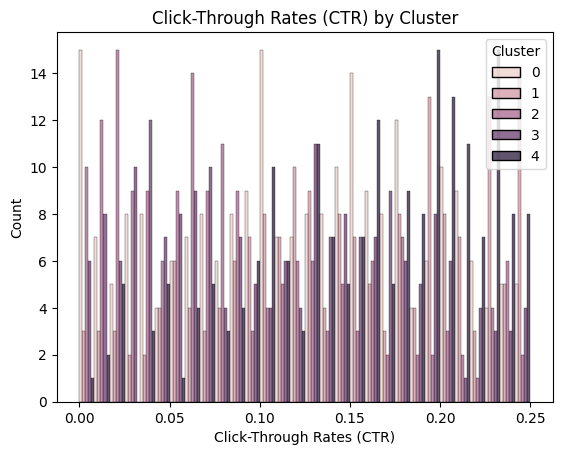

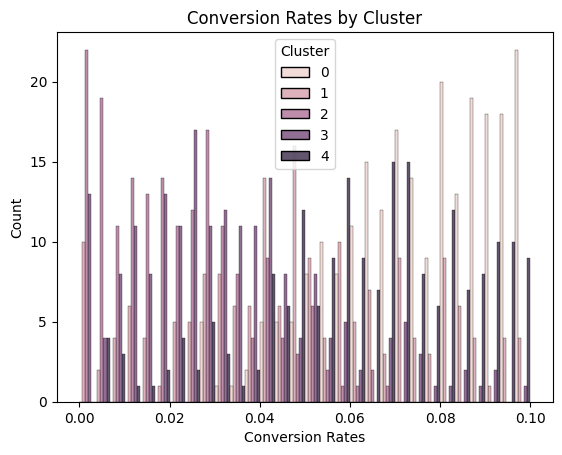

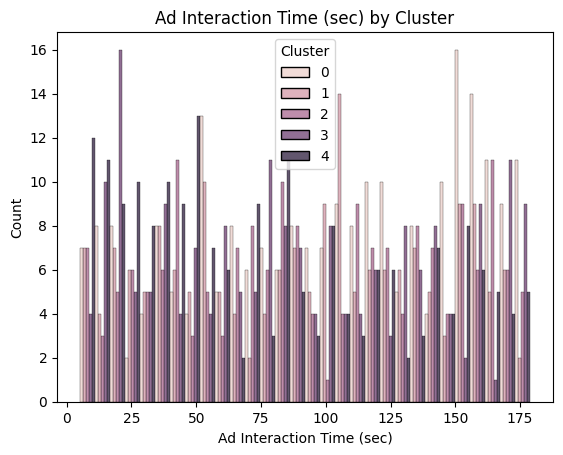

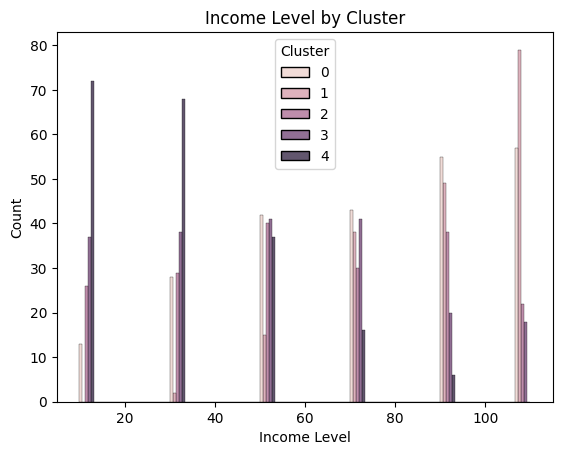

In [24]:
# Visualize clusters with histograms
for feature in features.columns:
    plt.figure()
    sns.histplot(data=data, x=feature, hue='Cluster', multiple='dodge', bins=30)
    plt.title(f'{feature} by Cluster')
    plt.show()

C:\Users\MK\AppData\Local\Temp\ipykernel_18040\137095950.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", cluster_means.shape[0])


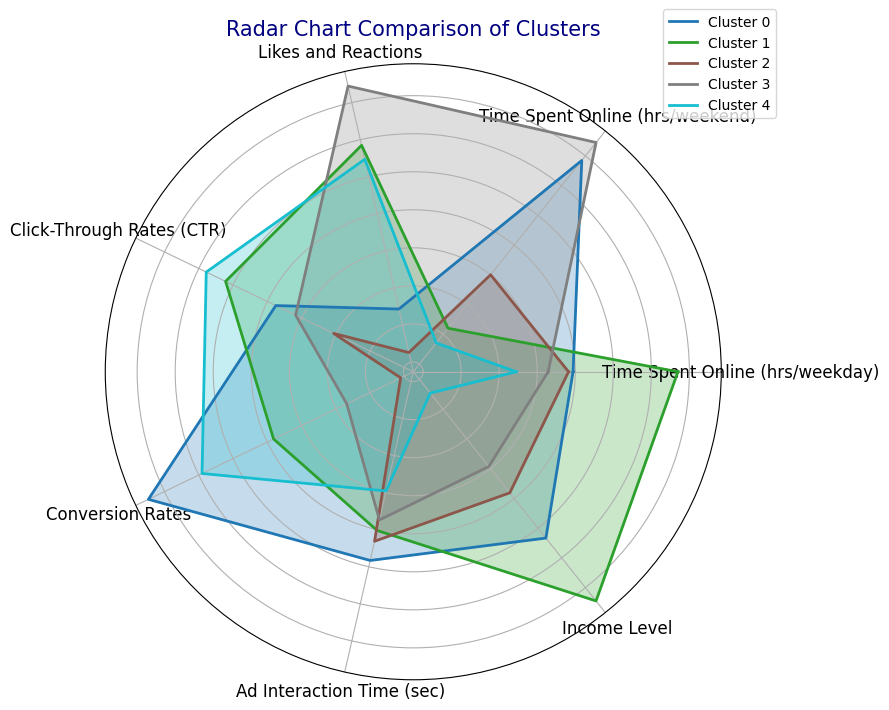

In [25]:
# Assuming `features` and `cluster_means` are already defined
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
cluster_means_scaled = pd.DataFrame(features_scaled, columns=features.columns).groupby(data['Cluster']).mean()

# Radar chart
labels = features.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Assign distinct colors
colors = plt.cm.get_cmap("tab10", cluster_means.shape[0])

for i, row in cluster_means_scaled.iterrows():
    values = row[labels].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}', color=colors(i))
    ax.fill(angles, values, alpha=0.25, color=colors(i))

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Radar Chart Comparison of Clusters', size=15, color='navy')
plt.show()

In [27]:
# Summary
print("Cluster Analysis Summary")
print(cluster_means)

Cluster Analysis Summary
            User ID  Likes and Reactions  Followed Accounts  \
Cluster                                                       
0        496.474790          3176.542017         253.928571   
1        523.901639          6307.934426         261.032787   
2        510.756757          2344.070270         240.675676   
3        499.553846          7440.661538         254.764103   
4        475.185930          6040.869347         246.381910   

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               2.739076                         6.042857   
1                               3.620765                         3.186885   
2                               2.701081                         4.096757   
3                               2.529744                         6.348718   
4                               2.261307                         2.9361

In [28]:
print(cluster_modes)

         User ID    Age  Gender  Location  Language Education Level  \
Cluster                                                               
0              3  25-34  Female  Suburban   English             PhD   
1              4  35-44  Female  Suburban   Spanish        Bachelor   
2              8  35-44    Male     Urban  Mandarin     High School   
3              2  25-34  Female     Urban     Hindi          Master   
4              1  25-34    Male     Urban   English       Technical   

         Likes and Reactions  Followed Accounts      Device Usage  \
Cluster                                                             
0                       1116                153      Desktop Only   
1                       4186                421      Desktop Only   
2                       2281                175       Mobile Only   
3                       6356                429  Mobile + Desktop   
4                       9245                264       Mobile Only   

         Time Spen

In [29]:
# Naming clusters
data['Cluster Name'] = data['Cluster'].map({
    0: 'Weekend Warriors',
    1: 'Engaged Professionals',
    2: 'Low-Key Users',
    3: 'Active Explorers',
    4: 'Budget Browsers'
})

print("Segment Names Assigned")

Segment Names Assigned


In [30]:
# Final summary
print("Summary of User Profiling and Segmentation")
print(data[['User ID', 'Cluster', 'Cluster Name']].head())

Summary of User Profiling and Segmentation
   User ID  Cluster           Cluster Name
0        1        4        Budget Browsers
1        2        3       Active Explorers
2        3        0       Weekend Warriors
3        4        1  Engaged Professionals
4        5        4        Budget Browsers
